In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import scipy.optimize as opt
from scipy.constants import Boltzmann

import seaborn as sns

sns.set_style('white')
sns.set_palette(sns.color_palette('viridis'))

def figsize(scale=1.0):
    latex_width = 418.25555 #pt
    fig_width = latex_width/72.27 # inches
    fig_height = fig_width * (np.sqrt(5)-1.0)/2.0
    return [fig_width*scale, fig_height*scale]

params = {
    'font.size': 11,
    'font.family': 'serif',
    'font.serif': [],
    'axes.labelsize': 11,
    'legend.fontsize': 11,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'figure.figsize': figsize(scale=1.0),
    'text.usetex': True,
    'pgf.texsystem': 'pdflatex',
    'text.latex.unicode': True
    }
plt.rcParams.update(params)
plt.rcParams['text.latex.preamble'].extend([r'\usepackage{amsmath}'])

In [54]:
def F(x_1, E_0c2, bT):
    # TODO: Set constants
    boltzmann = Boltzmann
    temperature = bT/boltzmann #294.15 # K (21 C)
    
    
    x_2 = 1.0 - x_1
    assert((x_1 + x_2) == 1.0)
        
    return boltzmann * temperature * (x_1 * np.log(x_1) + x_2 * np.log(x_2)) - \
        (E_0c2 * (x_1**2 + x_2**2))

/home/lukas/bin/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:643: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


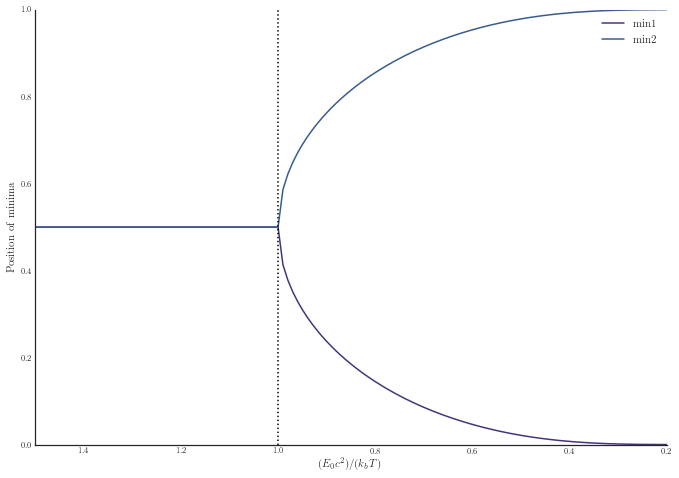

In [74]:
def find_mins(ratio, verbose=False):
    kB = 294.15 * Boltzmann
    E0c2 = kB/ratio
    def to_opt(x_1):
        #x_1 = 0.5
        x_2 = 1.0 - x_1

        E_0 = 0.9 * 10**(-23)
        return F(x_1,E0c2, 294.15*Boltzmann)    
    min1 = opt.minimize_scalar(to_opt, bounds=(10e-7, 0.5),method='bounded', tol=10e-10)
    min2 =  opt.minimize_scalar(to_opt, bounds=(0.5, 1.0-10e-7),method='bounded',tol=10e-10)
    
    min_diff = np.abs(min1.fun - min2.fun)
    assert(min_diff <= 10e-10)
    
    #opt.minimize(to_opt, bounds=[(10e-7, 1.0-10e-7)], x0=[1000], _pgtol=10e-10)
    if verbose:
        print(min1, '\n', min2)
    return min1.x, min2.x

x = np.arange(1.5, 0.1, -0.01)
y = [find_mins(x) for x in x]
y1, y2 = zip(*y)
fig, ax = plt.subplots(figsize=(8*np.sqrt(2),8))
ax.plot(x,y1, label='min1')
ax.plot(x,y2, label='min2')
ax.set_ylabel('Position of minima')
ax.set_xlabel('$(E_0 c^2)/(k_b T)$')
ax.axvline(1.0, linestyle='dotted', c='black')
ax.invert_xaxis()
ax.set_xbound(1.5, 0.2)
ax.set_ybound(0.0, 1.0)
ax.legend()
sns.despine(fig)
fig.savefig('position_of_minima.png', bbox_inches='tight', transparent=True)

In [56]:
find_mins(0.1, True)

     fun: -4.0611755148156172e-20
 message: 'Solution found.'
    nfev: 43
  status: 0
 success: True
       x: 1.0005012707797992e-06 
      fun: -4.0611754555699189e-20
 message: 'Solution found.'
    nfev: 35
  status: 0
 success: True
       x: 0.99999897595638976


/home/lukas/bin/anaconda3/lib/python3.6/site-packages/scipy/optimize/_minimize.py:643: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


(1.0005012707797992e-06, 0.99999897595638976)

In [57]:
# Just as a sanity check, is unused.
def find_num_of_mins(E0, c, eps=10e-4, verbose=True):
    E0c2 = E0 * c**2
    def to_opt(x_1):
        #x_1 = 0.5
        x_2 = 1.0 - x_1

        E_0 = 0.9 * 10**(-23)
        return F(x_1,E0c2, 294.15*Boltzmann)    
    min1 = opt.minimize_scalar(to_opt, bounds=(10e-7, 0.5),method='bounded', tol=10e-10)
    min2 =  opt.minimize_scalar(to_opt, bounds=(0.5, 1.0-10e-7),method='bounded',tol=10e-10)
            
    if verbose:
        print(min1, '\n', min2)
            
    min_diff = np.abs(min1.fun - min2.fun)
    assert(min_diff <= 10e-7)
    
    x_diff = np.abs(min1.x - min2.x)
    if (x_diff > eps):
        return 2
    else:
        return 1

    return min1.x, min2.x

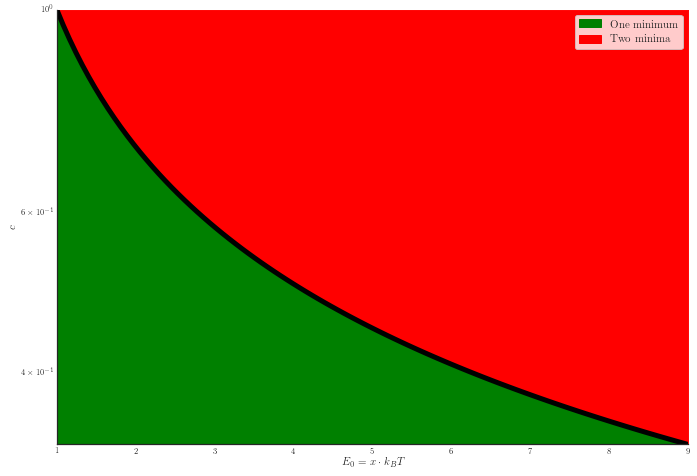

In [80]:
kB = 294.15 * Boltzmann
E0c2_max = kB/1.5
E0c2_min = kB/0.5

c_min = 0.01 / 100
c_max = 1 / 100

def find_bifurcation_c(E0):
    # E0c2 should be equal to kB
    kB = 294.15 * Boltzmann
    return np.sqrt(kB/E0)

#E0_grid = np.linspace(E0c2_min/(c_max**2), E0c2_max/(c_min**2), 100)
x = np.linspace(1, 9, 100)
E0_grid = x * kB
y = find_bifurcation_c(E0_grid)
fig, ax = plt.subplots(figsize=(8*np.sqrt(2),8))
ax.set_yscale('log')
ax.set_xlim(1, 9)
ax.set_ylim(y.min(), y.max())
ax.set_xlabel('$E_0 = x \cdot k_B T$')
ax.set_ylabel('$c$')
ax.plot(x,y, linewidth=5, c='black')
ax.fill_between(x,0, y, label='One minimum', color='green')
ax.fill_between(x,y, 1, label='Two minima', color='red')
legend = ax.legend(frameon=True)
#legend.get_frame().set_color('black')
sns.despine(fig)
fig.savefig('phase_plot.png', transparent=True, bbox_inches='tight')

In [337]:
zz

array([  8.12235524e-17,   3.01549959e-14,   6.02287683e-14,
         9.03025406e-14,   1.20376313e-13,   1.50450085e-13,
         1.80523858e-13,   2.10597630e-13,   2.40671402e-13,
         2.70745175e-13])

In [ ]:
fig, ax = plt.subplots(figsize=(8*np.sqrt(2),8))
ax.set_yscale('log')
ax.set_xscale('log')
x = c_grid
y = E0_grid
x, y= np.meshgrid(x,y)
ax.scatter(x,y)
ax.set_xbound(c_grid.min(), c_grid.max())
ax.set_ybound(E0_grid.min(), E0_grid.max())
